# Notebook to represent Smiles as different kinds of graph objects.

### Dependencies  

In [1]:
%%capture 
# %%capture cell magic  makes this cell silent. 

# torch-geometric is an externsion of torch for working with graphs
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric
# pysmiles
!pip install pysmiles

# pyTDC is the Therapudic Data Commons 
!pip install PyTDC
!python -m pip install git+https://github.com/EBjerrum/molvecgen


# BROKEN
# # rdkit
# !wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
# !chmod +x Miniconda3-latest-Linux-x86_64.sh
# !time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
# !time conda install -q -y -c conda-forge rdkit

#### BROKEN see if you can just not use deepchem
# deepchem and rdkit. You might not need the one above.
# %tensorflow_version 1.x
# !wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
# !chmod +x Anaconda3-2019.10-Linux-x86_64.sh
# !bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
# !conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

In [2]:
import pandas as pd
from tdc.single_pred import ADME

data = ADME(name = 'CYP2C9_Veith') # this is the binary molecule problem
df = data.get_data()
df = df[['Drug','Y']]
df['Y'].value_counts() # unbalenced dataset. 

Downloading...
100%|██████████| 740k/740k [00:00<00:00, 823kiB/s]
Loading...
Done!


0    8047
1    4045
Name: Y, dtype: int64

In [3]:
a_smile = df['Drug'][0]
a_smile

'CCN1C(=O)/C(=C2\\SC(=S)N(CCCOC)C2=O)c2ccccc21'

In [6]:
# source: https://stackoverflow.com/questions/57062757/how-to-generate-a-graph-from-a-smiles-molecule-representation
from pysmiles import read_smiles
import networkx as nx
    
mol = read_smiles(a_smile)
print(type(mol))
# atom vector (C only)
print(mol.nodes(data='element'))
# adjacency matrix
print(nx.to_numpy_matrix(mol))

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded


<class 'networkx.classes.graph.Graph'>
[(0, 'C'), (1, 'C'), (2, 'N'), (3, 'C'), (4, 'O'), (5, 'C'), (6, 'C'), (7, 'S'), (8, 'C'), (9, 'S'), (10, 'N'), (11, 'C'), (12, 'C'), (13, 'C'), (14, 'O'), (15, 'C'), (16, 'C'), (17, 'O'), (18, 'C'), (19, 'C'), (20, 'C'), (21, 'C'), (22, 'C'), (23, 'C')]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

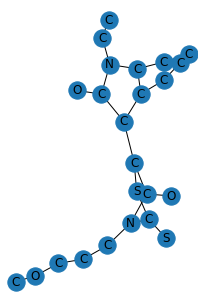

In [7]:
import matplotlib.pyplot as plt
elements = nx.get_node_attributes(mol, name = "element")
nx.draw(mol, with_labels=True, labels = elements, pos=nx.spring_layout(mol))
plt.gca().set_aspect('equal')

The same code will give you different pictures. 

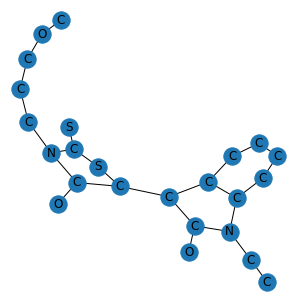

In [8]:
elements = nx.get_node_attributes(mol, name = "element")
nx.draw(mol, with_labels=True, labels = elements, pos=nx.spring_layout(mol))
plt.gca().set_aspect('equal')

In [9]:
elements

{0: 'C',
 1: 'C',
 2: 'N',
 3: 'C',
 4: 'O',
 5: 'C',
 6: 'C',
 7: 'S',
 8: 'C',
 9: 'S',
 10: 'N',
 11: 'C',
 12: 'C',
 13: 'C',
 14: 'O',
 15: 'C',
 16: 'C',
 17: 'O',
 18: 'C',
 19: 'C',
 20: 'C',
 21: 'C',
 22: 'C',
 23: 'C'}

## Mol is a molecule as a graph object

In [10]:
mol
# you might want ot use a MultiGraph where each shared electron 
#MultiGraph—Undirected graphs with self loops and parallel edges
# https://networkx.org/documentation/stable/reference/classes/index.html#which-graph-class-should-i-use 

In [11]:
adj = mol.adjacency() # https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.adjacency.html#networkx.Graph.adjacency 


In [12]:
[(n, nbrdict) for n, nbrdict in adj]

[(0, {1: {'order': 1}}),
 (1, {0: {'order': 1}, 2: {'order': 1}}),
 (2, {1: {'order': 1}, 3: {'order': 1}, 23: {'order': 1}}),
 (3, {2: {'order': 1}, 4: {'order': 2}, 5: {'order': 1}}),
 (4, {3: {'order': 2}}),
 (5, {3: {'order': 1}, 6: {'order': 2}, 18: {'order': 1}}),
 (6, {5: {'order': 2}, 7: {'order': 1.5}, 16: {'order': 1.5}}),
 (7, {6: {'order': 1.5}, 8: {'order': 1.5}}),
 (8, {7: {'order': 1.5}, 9: {'order': 2}, 10: {'order': 1.5}}),
 (9, {8: {'order': 2}}),
 (10, {8: {'order': 1.5}, 11: {'order': 1}, 16: {'order': 1.5}}),
 (11, {10: {'order': 1}, 12: {'order': 1}}),
 (12, {11: {'order': 1}, 13: {'order': 1}}),
 (13, {12: {'order': 1}, 14: {'order': 1}}),
 (14, {13: {'order': 1}, 15: {'order': 1}}),
 (15, {14: {'order': 1}}),
 (16, {6: {'order': 1.5}, 10: {'order': 1.5}, 17: {'order': 2}}),
 (17, {16: {'order': 2}}),
 (18, {5: {'order': 1}, 19: {'order': 1.5}, 23: {'order': 1.5}}),
 (19, {18: {'order': 1.5}, 20: {'order': 1.5}}),
 (20, {19: {'order': 1.5}, 21: {'order': 1.5}}),


https://github.com/pckroon/pysmiles/blob/master/pysmiles/read_smiles.py

This is what each mol graph is

A graph describing a molecule. Nodes will have an 'element', 'aromatic'
        and a 'charge', and if `explicit_hydrogen` is False a 'hcount'.
        Depending on the input, they will also have 'isotope' and 'class'
        information.
        Edges will have an 'order'.

In [13]:
mol = read_smiles(a_smile)
# each 
aromatic = mol.nodes(data='aromatic') # not sure what this is
elements = mol.nodes(data='element')
charges = mol.nodes(data='charge')
charges

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded


NodeDataView({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0}, data='charge')

In [14]:
nodes = list(mol.nodes)
nodes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [15]:
# https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/algorithms/coloring.html

In [16]:
!pip install grakel
# https://github.com/ysig/GraKeL

     |████████████████████████████████| 1.6MB 4.3MB/s 
     |████████████████████████████████| 163kB 39.4MB/s 


In [17]:
from grakel.datasets import fetch_dataset
# source: https://ysig.github.io/GraKeL/0.1a8/documentation/introduction.html#performing-graph-classification
# just copy pasted
MUTAG = fetch_dataset("MUTAG", verbose=False)
G = MUTAG.data
y = MUTAG.target


# the elements of G are a 

In [18]:
print(G[0][0]) # this is a set of links
print(type(G[0][0]))
print(G[0][1]) # this is a dictionary of NODE attributes
print(type(G[0][1]))
print(G[0][2]) # this is a dictionary of Edge Attributes
print(type(G[0][2]))

{(15, 13), (10, 11), (5, 6), (9, 8), (2, 1), (14, 13), (8, 9), (15, 16), (1, 6), (14, 9), (17, 15), (1, 2), (11, 10), (13, 12), (12, 13), (16, 15), (3, 4), (10, 9), (4, 10), (3, 2), (5, 4), (9, 14), (10, 4), (4, 5), (13, 15), (9, 10), (7, 5), (2, 3), (8, 7), (12, 11), (11, 12), (6, 5), (15, 17), (13, 14), (6, 1), (5, 7), (4, 3), (7, 8)}
<class 'set'>
{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 1, 16: 2, 17: 2}
<class 'dict'>
{(2, 1): 0, (1, 2): 0, (3, 2): 0, (2, 3): 0, (4, 3): 0, (3, 4): 0, (5, 4): 0, (4, 5): 0, (6, 5): 0, (5, 6): 0, (6, 1): 0, (1, 6): 0, (7, 5): 0, (5, 7): 0, (8, 7): 0, (7, 8): 0, (9, 8): 0, (8, 9): 0, (10, 9): 0, (9, 10): 0, (10, 4): 0, (4, 10): 0, (11, 10): 0, (10, 11): 0, (12, 11): 0, (11, 12): 0, (13, 12): 0, (12, 13): 0, (14, 13): 0, (13, 14): 0, (14, 9): 0, (9, 14): 0, (15, 13): 1, (13, 15): 1, (16, 15): 2, (15, 16): 2, (17, 15): 1, (15, 17): 1}
<class 'dict'>


### In order to use the grakel Transformer you need

1. A set of edges
2. A dict of node attributes
3. A dict of edge attribures

In [19]:
from grakel.kernels import WeisfeilerLehman, VertexHistogram
wl_kernel = WeisfeilerLehman(n_iter=5, normalize=True, base_graph_kernel=VertexHistogram)

In [20]:
from sklearn.model_selection import train_test_split
G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.1, random_state=42)
y # just an array of targets. 

array([ 1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
        1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,
       -1])

In [21]:
K_train = wl_kernel.fit_transform(G_train)
print(K_train[0])
K_train.shape

[1.         0.73435802 0.73903538 0.67580622 0.72547625 0.67275093
 0.70682936 0.59217719 0.72525546 0.7243685  0.72492295 0.65005079
 0.71694145 0.64528535 0.63293787 0.61975118 0.64528535 0.73314905
 0.53062138 0.65565787 0.64290332 0.673636   0.62005816 0.63496323
 0.75996853 0.64635961 0.64528535 0.6360431  0.7252622  0.69552204
 0.71304817 0.81481481 0.63577527 0.73873571 0.67930409 0.73695553
 0.64664401 0.66910804 0.57389483 0.66559918 0.64281112 0.64549722
 0.65406548 0.69334428 0.66240091 0.65144663 0.66358173 0.71647794
 0.63915558 0.64684623 0.67179409 0.64549722 0.72586064 0.68333333
 0.72361644 0.65716018 0.68188405 0.70287476 0.65327458 0.72009521
 0.64664401 0.56444501 0.69501844 0.6292464  0.68569607 0.66712438
 0.65144663 0.63870856 0.63745526 0.73914469 0.6379134  0.70060375
 0.65366536 0.6438003  0.65983589 0.66209727 0.70833333 0.63836029
 0.70278193 0.75       0.72009521 0.70712009 0.67536049 0.65366536
 0.56699487 0.58327912 0.70608667 0.64332523 0.63788795 0.6491

(169, 169)

In [22]:
K_test = wl_kernel.transform(G_test)
K_test.shape # this is an array of the kernal of each graph

(19, 169)

In [23]:
from sklearn.svm import SVC
clf = SVC(kernel='precomputed')
clf.fit(K_train, y_train)
SVC(kernel='precomputed')

y_pred = clf.predict(K_test)

In [24]:
y_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1,
        1,  1])

In [25]:
from sklearn.metrics import accuracy_score
print("%2.2f %%" %(round(accuracy_score(y_test, y_pred)*100)))

84.00 %


In [26]:
import scipy as sp

In [27]:
G =read_smiles(a_smile)

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded


In [28]:
node_data = dict(G.nodes(data=True))
node_data

{0: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 3},
 1: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 2},
 2: {'aromatic': False, 'charge': 0, 'element': 'N', 'hcount': 0},
 3: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 0},
 4: {'aromatic': False, 'charge': 0, 'element': 'O', 'hcount': 0},
 5: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 0},
 6: {'aromatic': True, 'charge': 0, 'element': 'C', 'hcount': 0},
 7: {'aromatic': True, 'charge': 0, 'element': 'S', 'hcount': 0},
 8: {'aromatic': True, 'charge': 0, 'element': 'C', 'hcount': 0},
 9: {'aromatic': False, 'charge': 0, 'element': 'S', 'hcount': 0},
 10: {'aromatic': True, 'charge': 0, 'element': 'N', 'hcount': 0},
 11: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 2},
 12: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 2},
 13: {'aromatic': False, 'charge': 0, 'element': 'C', 'hcount': 2},
 14: {'aromatic': False, 'charge': 0, 'element': 'O', 'hcount'

In [29]:
edge_data = G.edges(data=True)
list(edge_data)

[(0, 1, {'order': 1}),
 (1, 2, {'order': 1}),
 (2, 3, {'order': 1}),
 (2, 23, {'order': 1}),
 (3, 4, {'order': 2}),
 (3, 5, {'order': 1}),
 (5, 6, {'order': 2}),
 (5, 18, {'order': 1}),
 (6, 7, {'order': 1.5}),
 (6, 16, {'order': 1.5}),
 (7, 8, {'order': 1.5}),
 (8, 9, {'order': 2}),
 (8, 10, {'order': 1.5}),
 (10, 11, {'order': 1}),
 (10, 16, {'order': 1.5}),
 (11, 12, {'order': 1}),
 (12, 13, {'order': 1}),
 (13, 14, {'order': 1}),
 (14, 15, {'order': 1}),
 (16, 17, {'order': 2}),
 (18, 19, {'order': 1.5}),
 (18, 23, {'order': 1.5}),
 (19, 20, {'order': 1.5}),
 (20, 21, {'order': 1.5}),
 (21, 22, {'order': 1.5}),
 (22, 23, {'order': 1.5})]

In [30]:
mol_edges = set(mol.edges)
mol_node_attributes = dict(mol.nodes(data='charge')) #simple version use data=True to get more node attribues
mol_edge_attributes = {edge: 0 for edge in mol_edges}

mol_for_kernel = [mol_edges, mol_node_attributes,mol_edge_attributes] # use this for kernel transformation
mol_for_kernel;

In [34]:

print(mol_for_kernel[0])
print(G[0])

{(10, 11), (22, 23), (5, 6), (8, 9), (18, 19), (1, 2), (16, 17), (18, 23), (6, 7), (12, 13), (20, 21), (5, 18), (8, 10), (2, 23), (3, 4), (2, 3), (14, 15), (11, 12), (19, 20), (3, 5), (0, 1), (13, 14), (10, 16), (21, 22), (7, 8), (6, 16)}
{1: {'order': 1}}


In [35]:
print(G[0][1])
print(mol_for_kernel[1])
type(G[0][1]) == type(mol_for_kernel[1])

{'order': 1}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0}


True

In [38]:
# kernal_of_mol = wl_kernel.fit_transform(mol_for_kernel)
# you need lots of molecules to get kernels
def convert_list_of_smiles_to_mols(smiles_list):
  mols =[]

  for s in smiles_list:
    a_mol = read_smiles(smiles=s)
    mol_edges = set(a_mol.edges)
    mol_node_attributes = dict(a_mol.nodes(data='element')) #simple version use data=True to get more node attribues
    mol_edge_attributes = {edge: 0 for edge in mol_edges}
    mol_for_kernel = [mol_edges, mol_node_attributes,mol_edge_attributes] # use this for kernel transformation
    mols.append(mol_for_kernel)

  return mols


In [49]:
%%capture
smiles = list(df.Drug)[:1000]# Only do first 1000 out of 12,000 for speed
mols = convert_list_of_smiles_to_mols(smiles);
len(mols);

# you now have 100 graphs of the mols in pyTDC 

In [50]:
G_train, G_test, y_train, y_test = train_test_split(mols, list(df.Y)[:1000], test_size=0.2, random_state=42)
print(len(G_train))
print(len(G_test))
print(len(y_train))
print(len(y_test))


800
200
800
200


In [54]:
py_tdc_kernel =  WeisfeilerLehman(n_iter=5, normalize=False, base_graph_kernel=VertexHistogram)

train_kernels  = py_tdc_kernel.fit_transform(G_train) # train the kernal encoder on the training dataset

test_kernels = py_tdc_kernel.transform(G_test)

In [55]:
# generic model with no tuning

clf = SVC(kernel='precomputed')
clf.fit(train_kernels, y_train)
SVC(kernel='precomputed')
y_test_pred = clf.predict(test_kernels)



In [57]:
from sklearn.metrics import average_precision_score ### You only care about true and false positives. often used for uneven datasets.

score = average_precision_score(y_test,y_test_pred)

### you are evaluated on AUPRC score. The score to beat is .713

print('AUPRC is:')
round(score,4)

AUPRC is:


0.4618